In [4]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

from scpy2.utils.nbmagics import install_magics
install_magics()
del install_magics

D:\Program_File\VSCode_Portable\workon_env\pyElan\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
d:\09_Work\Jun_Workspace\Python_Scientific_Computing_Best_Practices\繁中程式碼\codes\scpy2\utils\program_finder.py:25: UserWarning: Inkscape not found
  warnings.warn("Inkscape not found")


In [5]:
%matplotlib_svg
import numpy as np

## ufunc函數

ufunc 是 universal function 的縮寫，它是一種能對陣列的每個元素進行運算的函數。numpy 內建的多 ufunc 函數都是 C 語言實現的，因此它們的計算速度非常快。

In [6]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

`np.sin()` 是一個 ufunc 函數，其內部對陣列 x 的每個元素進行循環運算，並傳回一個儲存各個計算結果的陣列。運算之後陣列 x 中的值並沒有改變，而是新建立了一個陣列來儲存結果。也可以透過 `out` 參數指定儲存計算結果的陣列。因此如果希望直接在陣列 x 中儲存結果，可以將它傳遞給 `out` 參數：

In [7]:
t = np.sin(x, out=x)
t is x

True

ufunc 函數的傳回值仍然是計算的結果，只不過它就是陣列 x 。下面比較 `np.sin()` 和 python 標準函數庫的 `math.sin()` 的計算速度：

In [9]:
import math

x = [i * 0.001 for i in range(1000000)]

def sin_math(x):
    for i, t in enumerate(x):
        x[i] = math.sin(t)

def sin_numpy(x):
    np.sin(x, x)

def sin_numpy_loop(x):
    for i, t in enumerate(x):
        x[i] = np.sin(t)

xl = x[:]
%time sin_math(x)

xa = np.array(x)
%time sin_numpy(xa)

xl = x[:]
%time sin_numpy_loop(x)

Wall time: 158 ms
Wall time: 4.99 ms
Wall time: 710 ms


可以看出，`np.sin()` 比 `math.sin()` 快 10 倍多，這得益於 `np.sin()` 在 C 語言等級的循環計算。

> `列表推導式比循環更快`  
> 標準 python 中有比 for 循環更快的方案：使用列推導式 `x=[math.sin(t) for t in x]` 。但是列表推導式將產生一個新的列表，而非直接修改原清單中的元素。

`np.sin()` 同樣也支援計算單一數值的正弦值。不過值得注意的是，對單一數值的計算，`math.sin()` 則比 `np.sin()` 快很多。在 python 等級進行循環時，`np.sin()` 的計算速度只有 `math.sin()` 的 1/6。這是因為: `np.sin()` 為了同時支援陣列和單一數值的計算，其 C 語言的內部實現要比 `math.sin()` 複雜很多。此外，對於單一數值的計算，`np.sin()` 的傳回數值型態和 `math.sin()` 的不同，`math.sin()` 傳回的是 python 的標準 float 類型，`np.sin()` 傳回 np.float64 類型：

In [10]:
%C type(math.sin(0.5)); type(np.sin(0.5))

type(math.sin(0.5))  type(np.sin(0.5))
-------------------  -----------------
float                numpy.float64    


透過索引運算取得的陣列元素的類型為 numpy 中定義的類型，將其轉為 python 的標準類型還需要花費額外的時間。為了解決這個問題，陣列提供了 `item()` 方法，它用來取得陣列中的單一元素，並且直接傳回標準的 python 數值型態：

In [12]:
a = np.arange(6.0).reshape(2, 3)
print( a.item(1, 2), type(a.item(1, 2)), type(a[1, 2]) )

5.0 <class 'float'> <class 'numpy.float64'>


> 注意：在匯入時不建議使用 `import *` 全部載入，而是應該使用 `import numpy as np` 載入，這樣才可以根據需要選擇合適的函數。

### 四則運算

numpy 提供了許多 ufunc 函數，例如 `add()` 函數：

In [13]:
a = np.arange(0, 4)
b = np.arange(1, 5)
np.add(a, b)

array([1, 3, 5, 7])

`add()` 傳回一個陣列，它的每個元素都是兩個參數陣列的對應元素之和。
如果沒有指定 `out` 參數，它將建立一個新的陣列來儲存計算結果。
如果指定了第三個參數 `out`，則不產生新的陣列，而直接將結果儲存進指定的陣列。

In [8]:
np.add(a, b, a)
a

array([1, 3, 5, 7])

numpy 為陣列定義了各種數學運算符號，因此計算兩個陣列相加可以簡單地寫為 `a+b`，而 `np.add(a,b,a)`則可以用`a+=b`來表示。  
表2-1列出了陣列的運算子以及與之對應的 ufunc 函數，注意除號的意義根據是否啟動 `__future__.division` 有所不同。

表2-1 陣列的運算子以及對應的 ufunc 函數

| 運算式 | 對應的 ufunc 函數 |
|-------|------------------|
| y = x1 + x2 | add(x1, x2[, y]) |
| y = x1 - x2 | subtract(x1, x2[, y]) |
| y = x1 * x2 | multiply(x1, x2[, y]) |
| y = x1 / x2 | divide(x1, x2[, y])，如果兩個陣列的元素為整數，那麼用整數除法 |
| y = x1 / x2 | true_divide(x1, x2[, y])，總是傳回精確的商 |
| y = x1 // x2 | floor_divider(x1, x2[, y])，總是對傳回值取整 |
| y = -x | negative(x[, y]) |
| y = x1 ** x2 | power(x1, x2[, y]) |
| y = x1 % x2 | remainder(x1, x2[, y]), mod(x1, x2[, y]) |

陣列物件支援運算符號，相當大地簡化了算式的撰寫，不過要注意如果算式很複雜，並且要運算的陣列很大，將因為產生大量的中間結果而降低程式的運算速度。  
舉例來說，假設對 a, b, c, 三個陣列採用算式 `x=a*b+c` 加以計算，那麼它相當於：

```python
t = a*b
x = t+c
del t
```
也就是說，需要產生一個臨時陣列 t 來儲存乘法的運算結果，然後再產生最後的結果陣列 x。可以將算式分解為下面的兩行敘述，以減少一次記憶體分配：

```python
x = a*b
x += c
```


### 比較和布林運算

使用 `==`, `>` 等比較運算子對兩個陣列進行比較，將傳回一個布林陣列，它的每個元素值都是兩個陣列對應元素的比較結果。例如：

In [14]:
np.array([1, 2, 3]) < np.array([3, 2, 1])

array([ True, False, False])

每個比較運算子也與一個 ufunc 函數對應，表2-2 是比較運算子與 ufunc 函數的對照表。

表2-2 比較運算子與對應的 ufunc 函數 

| 運算式 | 對應的 ufunc 函數 |
|-------|------------------|
| y = x1 == x2 | equal(x1, x2[, y]) |
| y = x1 != x2 | not_equal(x1, x2[, y]) |
| y = x1 < x2 | less(x1, x2[, y]) |
| y = x1 <= x2 | less_equal(x1, x2[, y]) |
| y = x1 > x2 | greater(x1, x2[, y]) |
| y = x1 >= x2 | greater_equal(x1, x2[, y]) |

由於 python 中的布林運算使用 and, or, not 等關鍵字，它們無法被多載，因此陣列的布林運算只能透過對應的 ufunc 函數進行。這些函數名稱都以 `logical_` 開頭，在 IPython 中使用自動補全可以很容易地找到它們。  

下面是一個使用 `logical_or()` 進行「或運算」的實例：


In [16]:
a = np.arange(5)
b = np.arange(4, -1, -1)
print( a == b )
print( a > b )
print( np.logical_or(a == b, a > b) )  # 和 a>=b 相同

[False False  True False False]
[False False False  True  True]
[False False  True  True  True]


對兩個布林陣列使用 and, or, not 等進行布林運算，將拋出 `ValueError` 例外，因為布林陣列中有 True 也有 False，所以 numpy 無法確定使用者的運算目的：


In [17]:
a == b and a > b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

錯誤訊息告訴我們可以使用陣列的 `.any()` 或 `.all()` 方法，在 numpy 中同時也定義了 `.any()` 和 `.all()` 函數，它們的用法和 python 內建的 `any()` 和 `all()` 類似。只要陣列中有一個元素值為 True，`any()` 就傳回 True； 而只有當陣列的全部元素都為 True時，`all()`才傳回True。

In [18]:
%C np.any(a == b); np.any(a == b) and np.any(a > b)

np.any(a == b)  np.any(a == b) and np.any(a > b)
--------------  --------------------------------
True            True                            


以 `bitwise_` 開頭的函數是位元運算函數，包含 `bitwise_and`, `bitwise_not`, `bitwise_or`, `bitwise_xor` 等。也可以使用 `&`, `~`, `|`, `^` 等運算符號進行計算。

對 布林陣列 來說，`位元運算` 和 `布林運算` 的結果相同。但在使用時要注意，`位元運算符號` 的優先順序比 `比較運算子` 高，因此需要使用括號加強 `比較運算子` 的運算優先順序。例如：

In [19]:
(a == b) | (a > b)

array([False, False,  True,  True,  True])

In [14]:
~ np.arange(5)

array([-1, -2, -3, -4, -5])

整數陣列的位元運算和 C 語言的位元運算相同，在使用時要注意元素類型的符號，例如下面的 `arange()` 所建立的陣列的元素類型為 32 位元有號整數，因此對正數逐位元反轉將獲得負數。以整數 0 為例，逐位元反轉的結果是0xFFFFFFFF，在32位元有號整數中，這個值表示-1。

In [20]:
~ np.arange(5, dtype=np.uint8)

array([255, 254, 253, 252, 251], dtype=uint8)

### 自訂ufunc函數

透過 numpy 提供的標準 ufunc 函數，可以組合出複雜的運算式，在 C 語言等級對陣列的每個元素進行計算。但有時這種運算式不易撰寫，而對每個元素進行計算的程式卻很容易用 python 實現，這時可以用 `frompyfunc()` 將計算單一元素的函數轉換成 ufunc 函數，這樣就可以方便地用所產生的 ufunc 函數對陣列進行計算了。

舉例來說，用一個分段函數描述三角波，三角波的形狀如圖2-5所示，它分為三段：上升段、下降段和平坦段。

![](2022-03-18-13-23-54.png)

根據圖2-5，我們很容易寫出計算三角波上某個點的 Y 座標的函數。顯然 `triangle_wave()` 只能計算單一數值，不能對陣列直接進行處理。

In [21]:
def triangle_wave(x, c, c0, hc):
    x = x - int(x) # 三角波的周期為1，因此只取x座標的小數部分進行計算
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r

我們可以用下面的程式，先使用清單推導式計算出一個列表，然後用 `np.array()` 將清單轉為陣列。這種做法每次都需要使用清單推導式語法呼叫函數，這對於多維陣列很麻煩。

In [22]:
x = np.linspace(0, 2, 1000)
y1 = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])

透過 `.frompyfunc()` 可以將計算單一值的函數轉為能對陣列的每個元素進行計算的 ufunc 函數，`.frompyfunc()` 的呼叫格式為：
```python
frompyfunc(func, nin, nout)
```
其中：
- func: 是計算單一元素的函數。
- nin: 是func 的輸入參數的個數。
- nout: 是 func 的傳回值的個數。

下面程式使用 `.frompyfunc()` 將 triangle_wave() 轉為 ufunc 函數物件 triangle_ufunc1()：

In [23]:
triangle_ufunc1 = np.frompyfunc(triangle_wave, 4, 1)
y2 = triangle_ufunc1(x, 0.6, 0.4, 1.0)

值得注意的是，triangle_ufunc1() 所傳回的陣列的元素類型是 object，因此還需要呼叫陣列的 `astype()` 方法，以將其轉為雙精度浮點陣列：

In [25]:
%C y2.dtype; y2.astype(np.float64).dtype

 y2.dtype   y2.astype(np.float64).dtype
----------  ---------------------------
dtype('O')  dtype('float64')           


使用 `np.vectorize()` 也可以實現和 `np.frompyfunc()` 類似的功能，但它可以透過 `otypes` 參數指定傳回的陣列的元素類型。`otypes` 參數可以是一個表示元素類型的字串，也可以是一個類型列表，使用清單可以描述多個傳回陣列的元素類型。下面的程式使用 `np.vectorize()` 計算三角波：

In [27]:
triangle_ufunc2 = np.vectorize(triangle_wave, otypes=[np.float64])
y3 = triangle_ufunc2(x, 0.6, 0.4, 1.0)

最後我們驗證一下結果：

In [28]:
%C np.all(y1 == y2); np.all(y2 == y3)

np.all(y1 == y2)  np.all(y2 == y3)
----------------  ----------------
True              True            


### 廣播

當使用 ufunc 函數對兩個陣列進行計算時，ufunc 函數會對這兩個陣列的對應元素進行計算，因此它要求這兩個陣列的形狀相同。如果形狀不同，會進行以下廣播(broadcasting)處理：

1. 讓所有輸入陣列都在其中維數最多的陣列看齊，`shape`屬性中不足的部分都透過在前面加 1 補齊。
2. 輸出陣列的 `shape` 屬性是輸入陣列的 `shape` 屬性的各個軸上的最大值。
3. 如果輸入陣列的某個軸的長度為 1 或與輸出陣列的對應軸的長度相同，這個陣列能夠用來計算，否則出錯。
4. 當輸入陣列的某個軸的長度為 1 時，沿著此軸運算時都用此軸上的第一組值。

上述 4 筆規則了解起來可能比較費勁，下面讓我們看一個實例。

先建立一個二維陣列 a，其形狀為(6,1):

In [29]:
a = np.arange(0, 60, 10).reshape(-1, 1)
%C a; a.shape

  a     a.shape
------  -------
[[ 0],  (6, 1) 
 [10],         
 [20],         
 [30],         
 [40],         
 [50]]         


再建立一維陣列 b，其形狀為 (5, ):

In [30]:
b = np.arange(0, 5)
%C b; b.shape

       b         b.shape
---------------  -------
[0, 1, 2, 3, 4]  (5,)   


計算 a 與 b 的和，獲得一個加法表，它相當於計算兩個陣列中所有元素對的和，獲得一個形狀為 (6,5) 的陣列：

In [31]:
c = a + b
%C c; c.shape

          c             c.shape
----------------------  -------
[[ 0,  1,  2,  3,  4],  (6, 5) 
 [10, 11, 12, 13, 14],         
 [20, 21, 22, 23, 24],         
 [30, 31, 32, 33, 34],         
 [40, 41, 42, 43, 44],         
 [50, 51, 52, 53, 54]]         


由於 a 和 b 的維數不同，根據規則 1.，需要讓 b 的 `shape` 屬性向 a 對齊，於是在 b 的 `shape` 屬性前加 1，補齊為(1,5)。相當於做了以下計算：

In [32]:
b.shape = 1, 5
%C b; b.shape

        b          b.shape
-----------------  -------
[[0, 1, 2, 3, 4]]  (1, 5) 


這樣，加法運算的兩個輸入陣列的 `shape` 屬性分別為 (6,1) 和 (1,5) ，根據規則 2.，輸出陣列的各個軸的長度為輸入陣列各個軸的長度的最大值，可知輸出陣列的 `shape` 屬性為 (6,5)。

由於 b 的第 0 軸的長度為 1，而 a 的第 0 軸的長度為 6，為了讓它們在第 0 軸上能夠相加，需要將 b 的第 0 軸的長度擴充為 6 ，這相當於:

In [33]:
b = b.repeat(6, axis=0)
%C b; b.shape

        b          b.shape
-----------------  -------
[[0, 1, 2, 3, 4],  (6, 5) 
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4]]         


這裡的 `repeat()` 方法沿著 `axis` 參數指定的軸複製陣列中各個元素的值。由於 a 的第 1 軸的長度為 1，而 b 的第 1 軸的長度為 5，為了讓它們在第 1 軸上能夠相加，需要將 a 的第 1 軸的長度擴充為 5，這相當於：

In [34]:
a = a.repeat(5, axis=1)
%C a; a.shape

          a             a.shape
----------------------  -------
[[ 0,  0,  0,  0,  0],  (6, 5) 
 [10, 10, 10, 10, 10],         
 [20, 20, 20, 20, 20],         
 [30, 30, 30, 30, 30],         
 [40, 40, 40, 40, 40],         
 [50, 50, 50, 50, 50]]         


經過上述處理之後，a 和 b 就可以按對應元素進行相加運算了。當然，在執行 a+b 運算時，numpy 內部並不會真正將長度為 1 的軸用 `repeat()` 進行擴充，這樣太浪費記憶體空間了。由於這種廣播計算很常用，因此 numpy 提供了 `ogrid` 物件，用於建立廣播運算甪的陣列。

In [35]:
x, y = np.ogrid[:5, :5]
%C x; y

  x            y        
-----  -----------------
[[0],  [[0, 1, 2, 3, 4]]
 [1],                   
 [2],                   
 [3],                   
 [4]]                   


此外，numpy 還提供了 `mgrid` 物件，它的用法和 `ogrid` 物件類似，但是它所傳回的是進行廣播之後的陣列：

In [38]:
x, y = np.mgrid[:5, :5]
%C x; y

        x                  y        
-----------------  -----------------
[[0, 0, 0, 0, 0],  [[0, 1, 2, 3, 4],
 [1, 1, 1, 1, 1],   [0, 1, 2, 3, 4],
 [2, 2, 2, 2, 2],   [0, 1, 2, 3, 4],
 [3, 3, 3, 3, 3],   [0, 1, 2, 3, 4],
 [4, 4, 4, 4, 4]]   [0, 1, 2, 3, 4]]


`ogrid` 是一個很有趣的物件，它像多維陣列一樣，用切片元組作為索引，傳回的是一組可以用來廣播計算的陣列。其切片索引有兩種形式：
- `開始值:結束值:步進值`，和 `np.arange(開始值, 結束值, 步進值)`類似。
- `開始值:結束值:長度j`，當第三個參數為虛數時，它表示所傳回的陣列的長度，和 `np.linspace(開始值, 結束值, 長度)` 類似。

In [39]:
x, y = np.ogrid[:1:4j, :1:3j]
%C x; y   

      x                 y        
--------------  -----------------
[[0.        ],  [[0. , 0.5, 1. ]]
 [0.33333333],                   
 [0.66666667],                   
 [1.        ]]                   


利用 `ogrid` 的傳回值，我們很容易計算二元函數在等間距網格上的值。下面是繪製 3D 曲面 $f(x,y)=xe^{x^2-y^2}$ 的程式:

In [40]:
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x * np.exp( - x**2 - y**2)

下圖為使用 `ogrid` 計算的 3D 曲面。

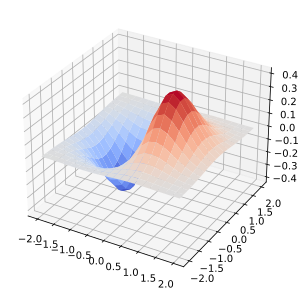

In [41]:
#%figonly=使用`ogrid`計算二元函數的曲面
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pl

fig = pl.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0.2)

為了充分利用 ufunc 函數的廣播功能，我們經常需要調整陣列的形狀，因此陣列支援特殊的索引物件 `None`，它表示在 `None` 對應的位置建立一個長度為 1 的新軸，例如對一維陣列 a ，`a[None, :]` 和 `a.reshape(1, -1)`相等，而 `a[:,None]` 和 `a.reshape(-1,1)` 相等：

In [31]:
a = np.arange(4)
%C a[None, :]; a[:, None]

  a[None, :]    a[:, None]
--------------  ----------
[[0, 1, 2, 3]]  [[0],     
                 [1],     
                 [2],     
                 [3]]     


下面的實例利用 `None` 作為索引，實現廣播運算：

In [42]:
x = np.array([0, 1, 4, 10])    
y = np.array([2, 3, 8])   
x[None, :] + y[:, None]

array([[ 2,  3,  6, 12],
       [ 3,  4,  7, 13],
       [ 8,  9, 12, 18]])

還可以使用 `ix_()` 將兩個一維陣列轉換成可廣播的二維陣列：

In [44]:
gy, gx = np.ix_(y, x) 
%C gx; gy; gx + gy

        gx            gy        gx + gy      
------------------  -----  ------------------
[[ 0,  1,  4, 10]]  [[2],  [[ 2,  3,  6, 12],
                     [3],   [ 3,  4,  7, 13],
                     [8]]   [ 8,  9, 12, 18]]


在上面的實例中，透過 `ix_()` 將陣列 x 和 y 轉換成能進行廣播運算的二維陣列。注意陣列 y 對應廣播運算結果中的第 0 軸，而陣列 x 與第 1 軸對應。`ix_()` 的參數可以是 N 個一維陣列，它將這些陣列轉換成 N 維空間中可廣播的 N 維陣列。

### ufunc的方法

ufunc 函數物件本身還有一些方法函數，這些方法只對兩個輸入、一個輸出的 ufunc 函數有效，其他的 ufunc 物件呼叫這些方法時會拋出 `ValueError` 例外。

`reduce()` 方法和 python 的 `reduce()` 函數類似，它沿著 `axis` 參數指定的軸對陣列操作，相當於將 `<op>` 運算子插入到沿 `axis` 軸的所有元素之間： `<op>.reduce(array, axis=0, dtype=None)`。例如：

In [45]:
r1 = np.add.reduce([1, 2, 3])  # 1 + 2 + 3
r2 = np.add.reduce([[1, 2, 3], [4, 5, 6]], axis=1)  # (1+2+3),(4+5+6)
%C r1; r2

r1     r2   
--  --------
6   [ 6, 15]


`accumulate()` 方法和 `reduce()` 類似，只是它傳回的陣列和輸入陣列的形狀相同。儲存所有的中間計算結果：

In [46]:
a1 = np.add.accumulate([1, 2, 3])
a2 = np.add.accumulate([[1, 2, 3], [4, 5, 6]], axis=1)
%C a1; a2

    a1           a2      
---------  --------------
[1, 3, 6]  [[ 1,  3,  6],
            [ 4,  9, 15]]


`reduceat()` 方法計算多組 `reduce()` 的結果，透過 `indices` 參數指定一系列的起始和終止位置。它的計算有些特別，讓我們透過實例詳細解釋一下：

In [37]:
a = np.array([1, 2, 3, 4])
result = np.add.reduceat(a, indices=[0, 1, 0, 2, 0, 3, 0])
result

array([ 1,  2,  3,  3,  6,  4, 10])

對於 `indices` 參數中的每個元素都會計算出一個值，因此最後的計算結果和 `indices` 參數的長度相同。結果陣列 result 中除最後一個元素之外，都按照以下計算得出：

```python
if indices[i] < indices[i+1]:
    result[i] = <op>.reduce(indices[i]:indices[i+1])
else:
    result[i] = a[indices[-1]:]
```
而最後一個元素如下計算:
```python
<op>.reduce(a[indices[-1]:])
```
因此在上面的實例中，陣列 result 的每個元素按照以下計算得出:
```
    1: a[0] -> 1
    2: a[1] -> 2
    3: a[0] + a[1] -> 1 + 2
    3: a[2] -> 3
    6: a[0] + a[1] + a[2] -> 1 + 2 + 3 = 6
    4: a[3] -> 4
    10: a[0] + a[1] + a[2] + a[4] -> 1 + 2 + 3 + 4 = 10
```

可以看出 `result[::2]` 和 `a` 相等，而 `result[1::2]` 和 `np.add.accumulate(a)` 相等。

ufunc 函數物件的 `outer()` 方法等於以下程式：
```python
a.shape += (1,)*b.ndim
<op>(a,b)
a = a.squeeze()
```
其中 `squeeze()` 方法剔除陣列 a 中長度為 1 的軸。讓我們看一個實例：

In [47]:
np.multiply.outer([1, 2, 3, 4, 5], [2, 3, 4])

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12],
       [ 8, 12, 16],
       [10, 15, 20]])

可以看出透過 `outer()` 計算的結果是以下乘法表：
```
* | 2  3  4
------------
1 | 2  3  4
2 | 4  6  8
3 | 6  9 12
4 | 8 12 16
5 |10 15 20
```
如果將這兩個陣列按照等同程式一步一步地進行計算，就會發現乘法表最後是透過廣播的方式計算出來的。